In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sonalisingh1411/mallcustomersdataset")

print("Path to dataset files:", path)

100%|██████████| 1.56k/1.56k [00:00<00:00, 1.35MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sonalisingh1411/mallcustomersdataset/versions/1


In [2]:
import pandas as pd

# Load the dataset
file_path = path + "/Mall_Customers.csv"  # Update with the correct file name if necessary
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [4]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X_scaled, method='ward')  # 'ward' is commonly used, but you can experiment with 'single', 'complete', etc.


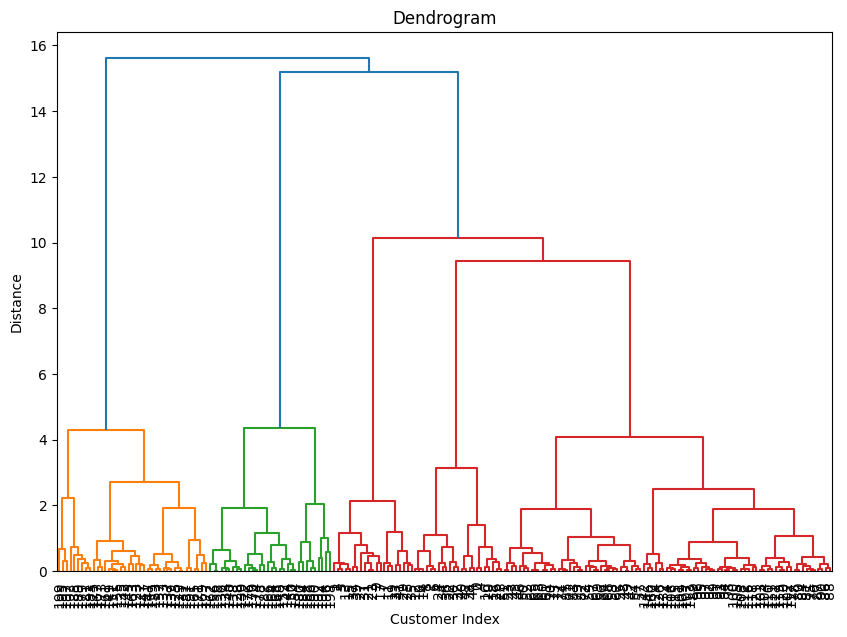

In [7]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()


In [8]:
from scipy.cluster.hierarchy import fcluster

# Define the maximum distance threshold or the desired number of clusters
num_clusters = 5  # Change based on your observation from the dendrogram
clusters = fcluster(Z, num_clusters, criterion='maxclust')  # Use 'distance' for distance-based threshold

# Add cluster labels to the dataset
df['Cluster'] = clusters
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


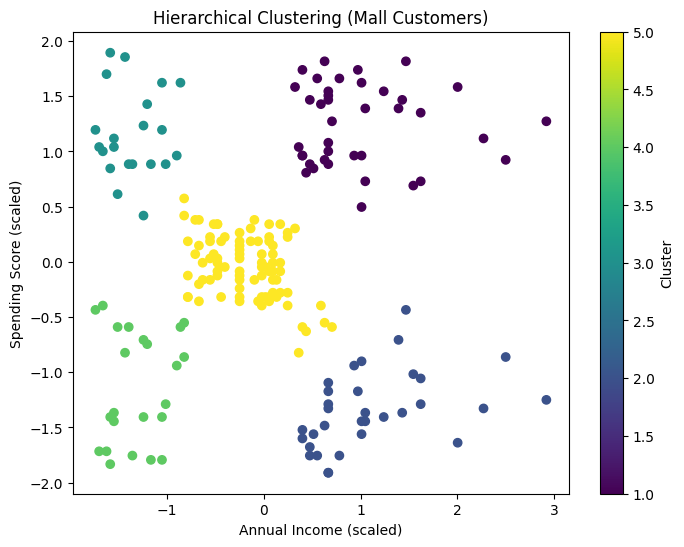

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering (Mall Customers)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.colorbar(label='Cluster')
plt.show()


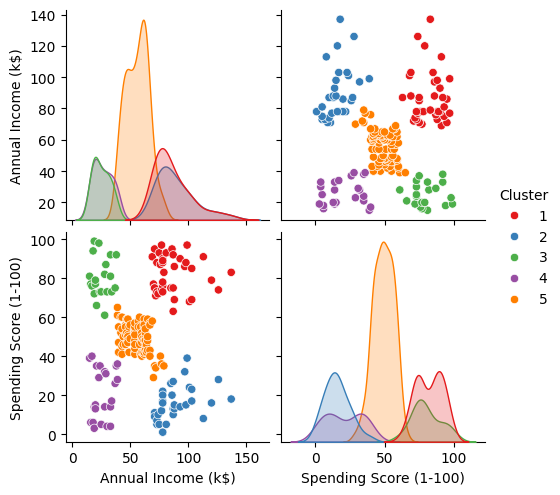

In [10]:
import seaborn as sns
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='Set1')
plt.show()


In [12]:
Z_single = linkage(X_scaled, method='single')
Z_complete = linkage(X_scaled, method='complete')
Z_average = linkage(X_scaled, method='average')


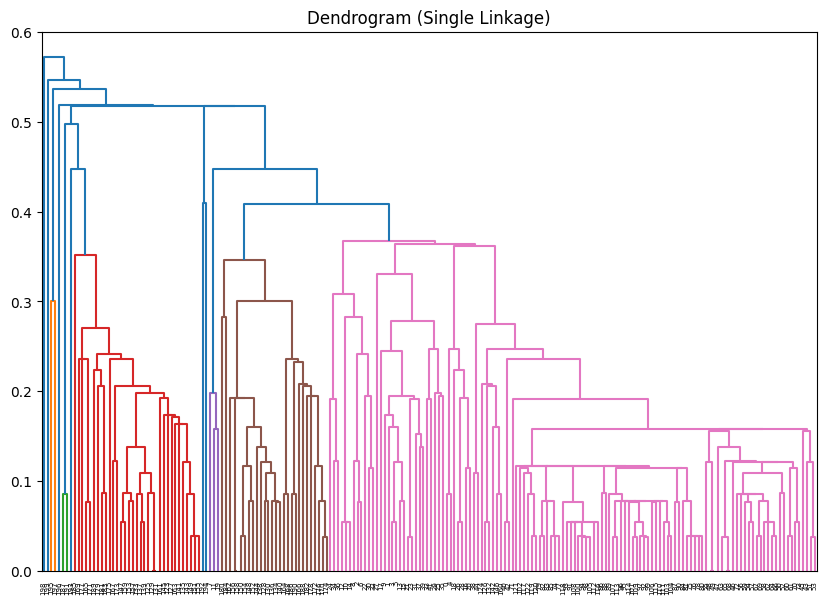

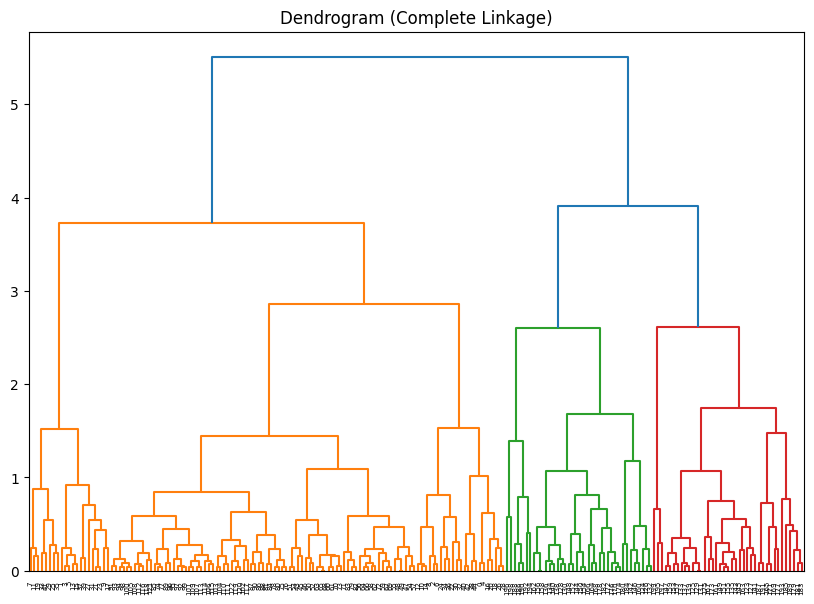

In [13]:
plt.figure(figsize=(10, 7))
dendrogram(Z_single, labels=df.index)
plt.title("Dendrogram (Single Linkage)")
plt.show()

plt.figure(figsize=(10, 7))
dendrogram(Z_complete, labels=df.index)
plt.title("Dendrogram (Complete Linkage)")
plt.show()
